# Substrings

There are several efficient algorithms for substring search. The Rabin-Karp algorithm is one that makes use of hashing.

In [1]:
m = 1_000_003
alpha = 256

In [2]:
# This function computes a hash code for string s.
# The algorithm is O(k) where k = len(s)
def single_hash(s):
    h = 0
    for c in s:
        h = (alpha * h + ord(c)) % m
    return h

The clever idea behind this algorithm is to compute hash codes efficiently in a sliding window.

In [3]:
# This function generates hash codes each k-length substring of a string s.
# Each time it provides the hash code and the start index of the substring.
# The first call is O(k), but each subsequent call is O(1).
def rolling_hash(s, k):
    h = single_hash(s[:k])
    yield h, 0
    
    ak1 = pow(alpha, k-1, m) # efficiently calculates alpha^(k-1) % m
    for i in range(k, len(s)): # i is the index of the new character
        h = h - ak1 * ord(s[i-k]) # drop the leftmost character
        h = (alpha * h + ord(s[i])) % m # pull in the new character
        yield h, i - k + 1

Then we can compare substrings only when their hash codes match, which should be very rare unless the substrings themselves match.

In [4]:
# This function returns whether sub is a substring of s.
# The algorithm is O(n+k) in the average case where n = len(s) and k = len(sub).
def rabin_karp(sub, s):
    sub_code = single_hash(sub)
    for code, i in rolling_hash(s, len(sub)):
        if code == sub_code and s[i:i+len(sub)] == sub:
            return True
    return False

Let's see if this algorithm really does improve on our previous attempt.

In [5]:
# This function returns whether sub is a substring of s.
# The algorithm is O(nk) where n = len(s) and k = len(sub).
# The best case scenario would be more like O(n).
def substring(sub, s):
    for i in range(len(s) - len(sub) + 1):
        found = True
        for j in range(len(sub)):
            if s[i+j] != sub[j]:
                found = False
                break
        if found:
            return True
    return False

In [6]:
# This function just gives a consistent interface for the built-in version.
def built_in(sub, s):
    return sub in s

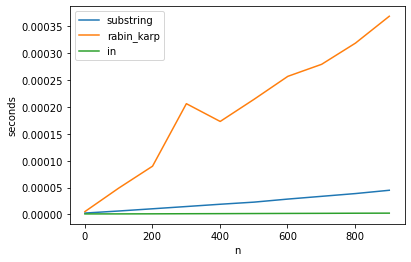

In [7]:
# This function times a worst-case substring search on a range of problem sizes.
from random import randrange
def timer(search, lengths):
    times = []
    for n in lengths:
        s = "a" * n
        sub = "a" * (n // 2) + "b"
        time = %timeit -n1 -r1 -o -q search(sub, s)
        times.append(time.average)
    return times


# This code plots some search times.
from matplotlib import pyplot
from numpy import arange

n = arange(1, 1000, 100)

pyplot.plot(n, timer(substring, n), label="substring")
pyplot.plot(n, timer(rabin_karp, n), label="rabin_karp")
pyplot.plot(n, timer(built_in, n), label="in")

pyplot.ylabel("seconds")
pyplot.xlabel("n")
pyplot.legend()
pyplot.show()

The built-in algorithm is better optimized, of course, but now we're in the same league.